# Minería de la red social Twitter con R

## Minería de redes sociales

En términos simples, la minería en las redes sociales es un análisis sistemático de la información generada a partir de las redes sociales. 

Necesitamos tener una aplicación creada en https://dev.twitter.com/apps antes de realizar cualquier solicitud de API a Twitter. Es un método estándar para que los desarrolladores obtengan acceso a la API y, lo que es más importante, ayuda a Twitter a observar y restringir que el desarrollador haga solicitudes de alta carga API.

1.	Ir https://apps.twitter.com/app/new.
2.	Pon el nombre de tu aplicación en el campo Nombre. Este nombre puede ser lo que quieras.
3.	Del mismo modo, ingrese la descripción en el campo Descripción.
4.	El campo del sitio web debe rellenarse con una URL válida, pero, de nuevo, puede ser cualquier URL aleatoria.
5.	Puede dejar el campo URL de devolución de llamada en blanco.

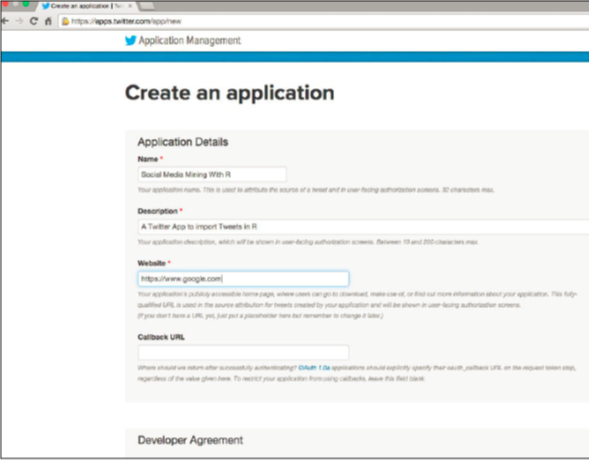

Después de la creación de esta aplicación, necesitamos encontrar la clave API y los valores de API secreta de la pestaña Clave y ficha de acceso. Considere el ejemplo que se muestra en la siguiente figura:

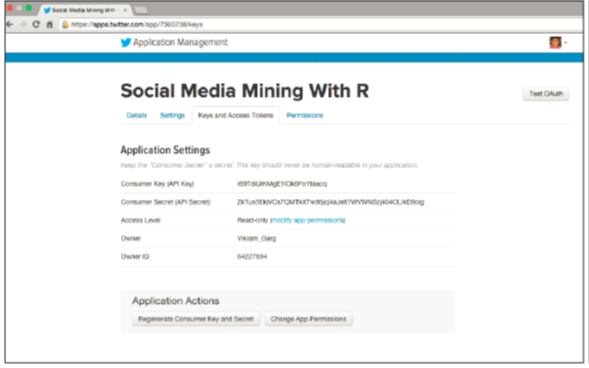

## Ejemplo practico sacar información de Twitter

**Funciones utiles**

- $setup\_twitter\_oauth():$ Sirve para realizar la conexion a la red de Twitter
- $searchTwitter(searchString, n=25, lang=NULL, since=NULL, until=NULL,
               locale=NULL, geocode=NULL, sinceID=NULL, maxID=NULL,
                 resultType=NULL, retryOnRateLimit=120, ...):$ Sirve para buscar Tweets por medio de una cadena
    - $searchString:$ Es un String con la cadena que se busca
    - $n:$ Numero de tweets que se quieren extraer
    - $lang:$ Restringe los tweets del lenguaje dado
    - $since:$ Restringe los tweets desde la fecha dada YYYY-MM-DD
    - $until:$ Restringe los tweets hasta la fecha dada YYYY-MM-DD
    - $geocode:$ Retorna los tweets por usuario localizado con un radio de latitu o longitud dado.
    - $resultTyp:$
        - $mixed:$ Incluye los tweets populares en tiempo real
        - $recent:$ Retorna los tweets mas recientes
        - $popular:$ Retorna solo los tweets mas populares
               
- $availableTrendLocations():$ Sirve para busar la tendendia segun la localizacion
- $closestTrendLocations():$ Sirve para cerrar la tendencia segun la localizacion
- $getTrends():$ Sirve para extraer la tendencia
- $getUser():$ Funcion para administrar usuarios de Twitter
- $get\_latest\_tweet\_id():$ Una función para recuperar el ID de tweet mas reciente de una base de datos
- $getCurRateLimitInfo():$ Una función para recuperar la información de límite de velocidad actual
- $getTwitterOAuth():$ Registre las credenciales de OAuth en la sesión de Twitter R

- $retweets(id, n = 20, ...):$ Estas funciones se pueden usar para devolver retweets o usuarios que retuitearon un tweet.
    - $id:$ El ID del tweet para obtener información sobre Retweet.
    - $n:$ La cantidad de resultados a devolver, hasta 100.

Estas funciones le permiten interactuar con información sobre un usuario de Twitter, recuperando su información base, lista de amigos, lista de seguidores y una línea de tiempo actualizada.
```{r} 
getUser(user, ...)
lookupUsers(users, includeNA=FALSE, ...)
```
- $user:$ El usuario de Twitter al detalle, puede ser un personaje o un objeto de usuario.
- $users:$ Un vector de identificadores de usuario o nombres de pantalla o una combinación de ambos.
- $includeNA:$ Si es TRUE dejará un elemento NA en la lista de devoluciones para los usuarios que no existen.

Estas funciones se pueden usar para configurar o eliminar el estado de Twitter de un usuario

```{r} 
tweet(text, ...)
updateStatus(text, lat=NULL, long=NULL, placeID=NULL,
             displayCoords=NULL, inReplyTo=NULL, mediaPath=NULL, 
             bypassCharLimit=FALSE, ...)
deleteStatus(status, ...)```

- $text:$ El texto a usar para un nuevo estado
- $status:$ Un objeto de clase

In [4]:
## Paquetes necesarios para la conexion a la API de Twitter
#install.packages(c("devtools", "rjson", "bit64", "httr"))
#library(devtools)
#install_github("geoffjentry/twitteR").
library(twitteR)
library(rjson)
library(bit64)
library(httr)
library(XML)
library(xml2)
library(stringr)
library(stringi)
library(rvest)
library(magrittr)
library(RCurl)
library(curl)
library(dplyr)
library(tuber)
library(RJSONIO)
library(jsonlite)
library(urltools)
library(RSelenium)
library(seleniumPipes)
library(webdriver)
library(XML2R)

In [6]:
# Las claves que da la API de Twitter para su conexion
api_key <- "xsz1VTSmKq2ijbcmkB2ICucSo"
api_secret <- "EKIzGAcECWhDBrkLfiVO7slv9vDwx5JdpwIKTF55pGsf0MEFu1"
access_token <- "1008819263686303744-ZzXRtW1FvH4ufls5427cMpF9cAKNWM"
access_token_secret <- "jF1FMhw1vBYgqz0Gb8sODqTdAh9ZR5mD8ezcLks1k9GvM"
setup_twitter_oauth(api_key, api_secret, access_token, access_token_secret)

[1] "Using direct authentication"


In [12]:
# Buscamos la palabra relacionada con "colombia" desde "2018-06-18" reciente (recent)
argentinaTweets_recent = searchTwitter("argentina", n = 10,since = "2018-06-21", resultType = "recent", lang = "es")
# Mostramos los tweets
argentinaTweets_recent

[[1]]
[1] "Nahuelg_23: RT @FerSappia: Que asco la mayoría del periodismo deportivo que hay en la actualidad en Argentina. Preguntarle a un jugador en caliente alg…"

[[2]]
[1] "Mr_Daniloop: RT @LANACION: La gente explotó en la cancha e insultó a Jorge Sampaoli https://t.co/HWQmplF6Zp https://t.co/DOlg8MwUqo"

[[3]]
[1] "ghagelstrom: RT @ghagelstrom: La Argentina volvió a la categoría de 'mercado emergente' https://t.co/i6Njmsm38t #radioxpilar vía @radioxpilar @aetchebar…"

[[4]]
[1] "Alina_Gallay: RT @MauriiiLopez: Argentina por más que sufra, no me canso, no me canso... Siempre te sigo <U+0001F1E6><U+0001F1F7> https://t.co/gKIeE7hbnK"

[[5]]
[1] "Elobser21185856: RT @JoseLChilavert_: Fuerza Argentina, Messi ustedes son los mejores. Vamos Argentina"

[[6]]
[1] "nicodepor2: RT @memedeportes: Argentina no es lo que era https://t.co/7M9YRQPaFk https://t.co/bV1OJQaHEJ"

[[7]]
[1] "matiascaceres00: RT @HumorDArgentina: Carlos #Bilardo: \"Si Sampaoli llega a ser el DT de Argentina me voy a v

In [11]:
# Se busca por popular (popular)
argentinaTweets_popular = searchTwitter("argentina", n = 10, since = "2018-06-19", resultType = "popular", lang = "es")
# Mostramos los tweets
argentinaTweets_popular

[[1]]
[1] "JoseLChilavert_: Messi usted es el mejor de la historia del futbol mundial. Exitos Argentina mi corazon esta con ustedes."

[[2]]
[1] "Argentina: Hoy, más que nunca, #SomosArgentina https://t.co/VQEpe3DO59"

[[3]]
[1] "JoseLChilavert_: Fuerza Argentina, Messi ustedes son los mejores. Vamos Argentina"

[[4]]
[1] "VarskySports: Un 21 de junio, pero de 2014, rescataba a Argentina ante Irán con un golazo en la última jugada del partido.\n\nUn 21… https://t.co/6iJIEIm5bq"

[[5]]
[1] "mauriciomacri: ¡Buenas noticias! La Argentina vuelve a ser mercado emergente y se abre a la llegada de capitales externos… https://t.co/ES9CjXPoqv"

[[6]]
[1] "FOXSportsArg: ¿QUIÉN DEBE ATAJAR EN LA ARGENTINA ANTE NIGERIA?\n\n#FOXenRusia - Vota con:\n\n<U+0001F501>Franco Armani\n<U+0001F493>Nahuel Guzmán\n <U+0001F5E3> Willy C… https://t.co/mgbTohg9YY"

[[7]]
[1] "odiomistweets: Con este resultado Argentina se cruzaría con Perú.\n\nEN EL AEROPUERTO."

[[8]]
[1] "Argentina: Nuestros jugadores, nuestro

In [13]:
# Retorna un data frame con name, country & woeid
Locs <- availableTrendLocations()
Locs

name,country,woeid
Worldwide,,1
Winnipeg,Canada,2972
Ottawa,Canada,3369
Quebec,Canada,3444
Montreal,Canada,3534
Toronto,Canada,4118
Edmonton,Canada,8676
Calgary,Canada,8775
Vancouver,Canada,9807
Birmingham,United Kingdom,12723


In [14]:
# Filter the data frame for Medellin (Colombia) and extract the woeid of the same
LocsColombia = subset(Locs, country == "Colombia")
LocsColombia
woeidMedellin = subset(LocsColombia, name == "Medellín")$woeid
woeidMedellin

,name,country,woeid
65,Bogotá,Colombia,368148
66,Cali,Colombia,368149
67,Medellín,Colombia,368150
68,Barranquilla,Colombia,368151
413,Colombia,Colombia,23424787


[1] "368150"

In [15]:
# getTrends takes a specified woeid and returns the trending topics associated with that woeid
trends = getTrends(woeid=woeidMedellin)
trends

name,url,query,woeid
Argentina,http://twitter.com/search?q=Argentina,Argentina,368150
Messi,http://twitter.com/search?q=Messi,Messi,368150
Caballero,http://twitter.com/search?q=Caballero,Caballero,368150
Modric,http://twitter.com/search?q=Modric,Modric,368150
Otamendi,http://twitter.com/search?q=Otamendi,Otamendi,368150
Perú,http://twitter.com/search?q=Per%C3%BA,Per%C3%BA,368150
#ARGCRO,http://twitter.com/search?q=%23ARGCRO,%23ARGCRO,368150
Rakitic,http://twitter.com/search?q=Rakitic,Rakitic,368150
Mascherano,http://twitter.com/search?q=Mascherano,Mascherano,368150
Rebic,http://twitter.com/search?q=Rebic,Rebic,368150


In [21]:
# Estas funciones se pueden usar para devolver retweets o usuarios que retuitearon un tweet.
retweets(id = "123", n = 10)

[[1]]
[1] "justusvoneichen: RT @tonystubblebine: finished analyzing smam/ac success rates"

[[2]]
[1] "wgssamintha: RT @tonystubblebine: finished analyzing smam/ac success rates"

[[3]]
[1] "frasesheavvy: RT @tonystubblebine: finished analyzing smam/ac success rates"

[[4]]
[1] "Maira_Agostinna: RT @tonystubblebine: finished analyzing smam/ac success rates"

[[5]]
[1] "Vaginocienta: RT @tonystubblebine: finished analyzing smam/ac success rates"

[[6]]
[1] "autumn_belieber: RT @tonystubblebine: finished analyzing smam/ac success rates"

[[7]]
[1] "skydown85: RT @tonystubblebine: finished analyzing smam/ac success rates"

[[8]]
[1] "sigit_darmadi: RT @tonystubblebine: finished analyzing smam/ac success rates"


In [22]:
getUser(user = "sigit_darmadi")

[1] "sigit_darmadi"

In [23]:
lookupUsers(c('sigit_darmadi', 'skydown85'))

$sigit_darmadi
[1] "sigit_darmadi"

$skydown85
[1] "skydown85"
